In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]

s = 1.0
sclist = [0.1, 0.5, 1.0]
L = 1.0
res_dir = 'nsc-ratio'
n_perms = 1

In [3]:
plot_data = {}
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        r1 = []
        r2 = []
        r3 = []
        r4 = []
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            res_years = pd.read_csv(fout+'_years.csv')
            r1.append(res.R1)
            r2.append(res.R2)
            r3.append(res.R3)
            r4.append(res.R4)
        plot_data[(true_n, sc)] = (
            pd.concat(r1, axis=0), pd.concat(r2, axis=0),
            pd.concat(r3, axis=0), pd.concat(r4, axis=0)
        )

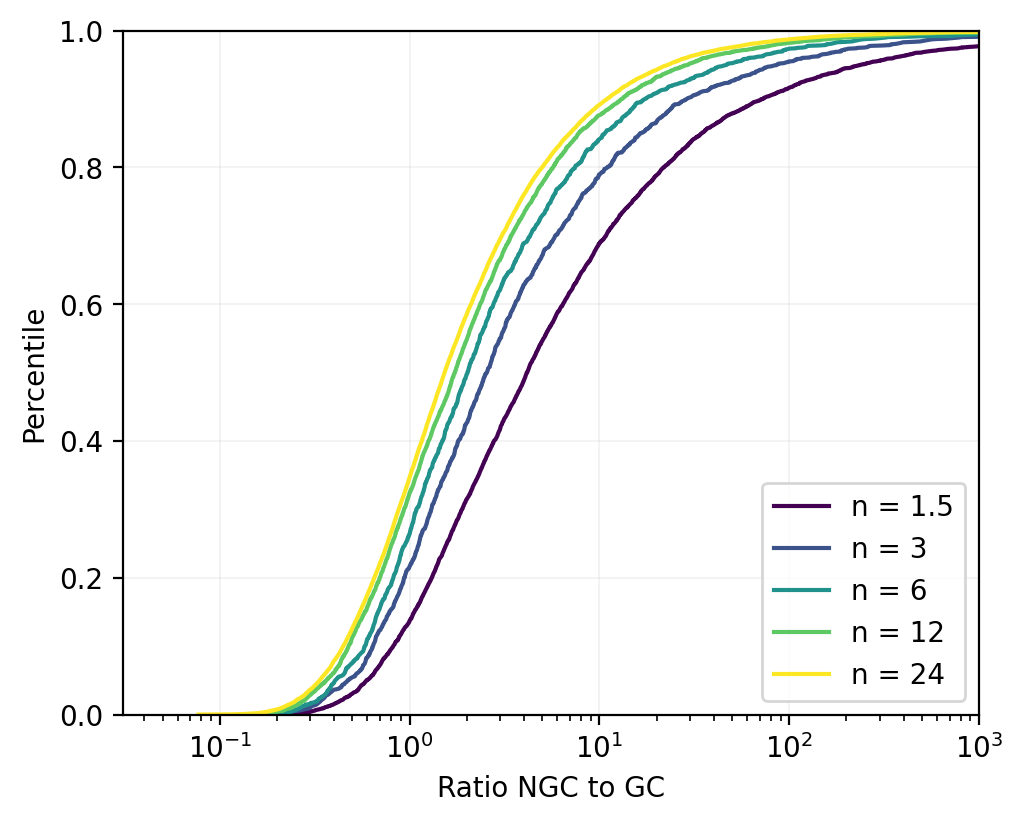

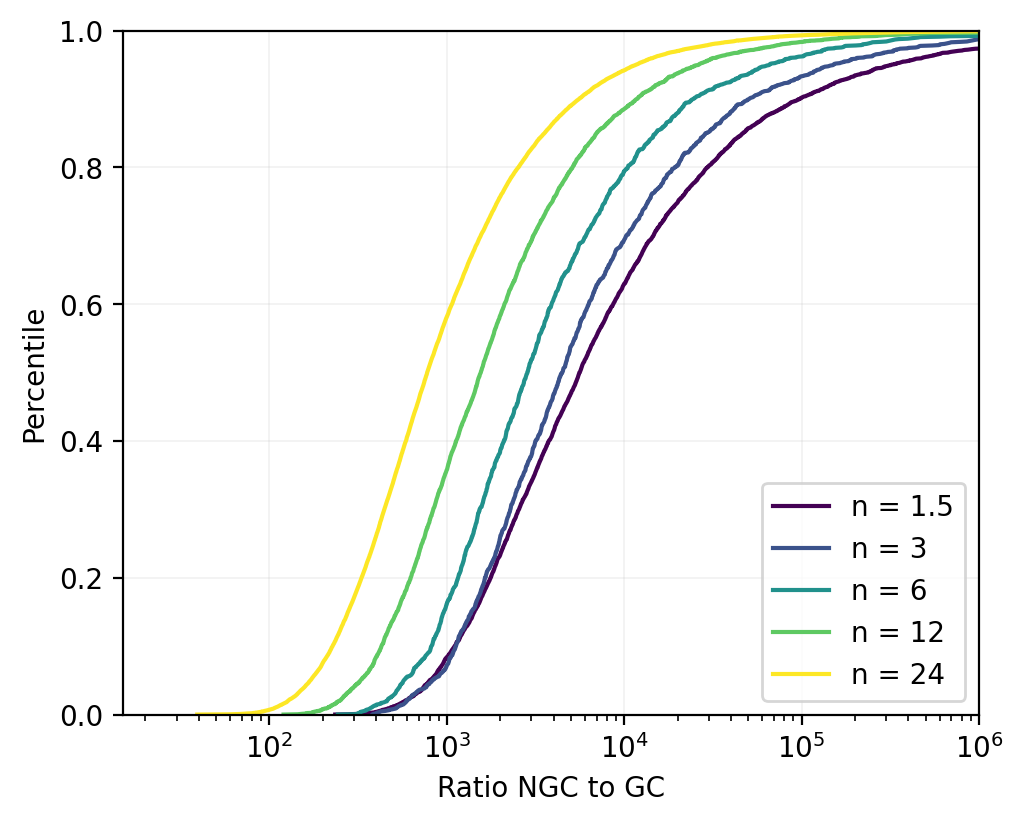

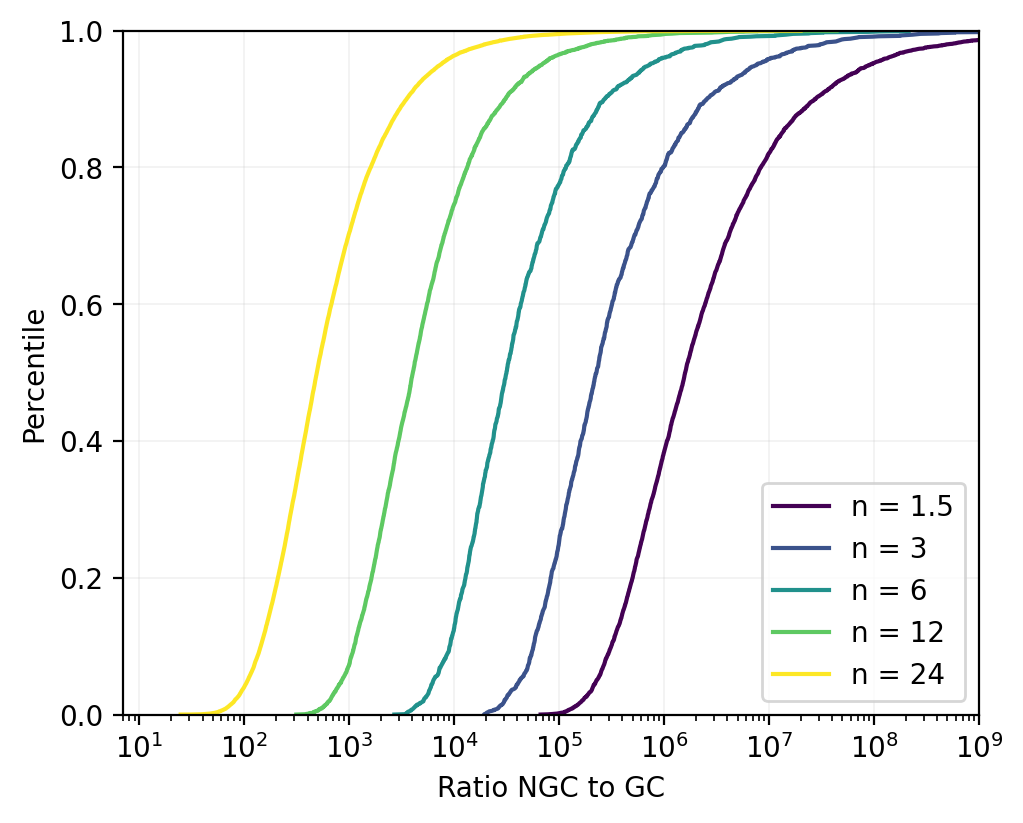

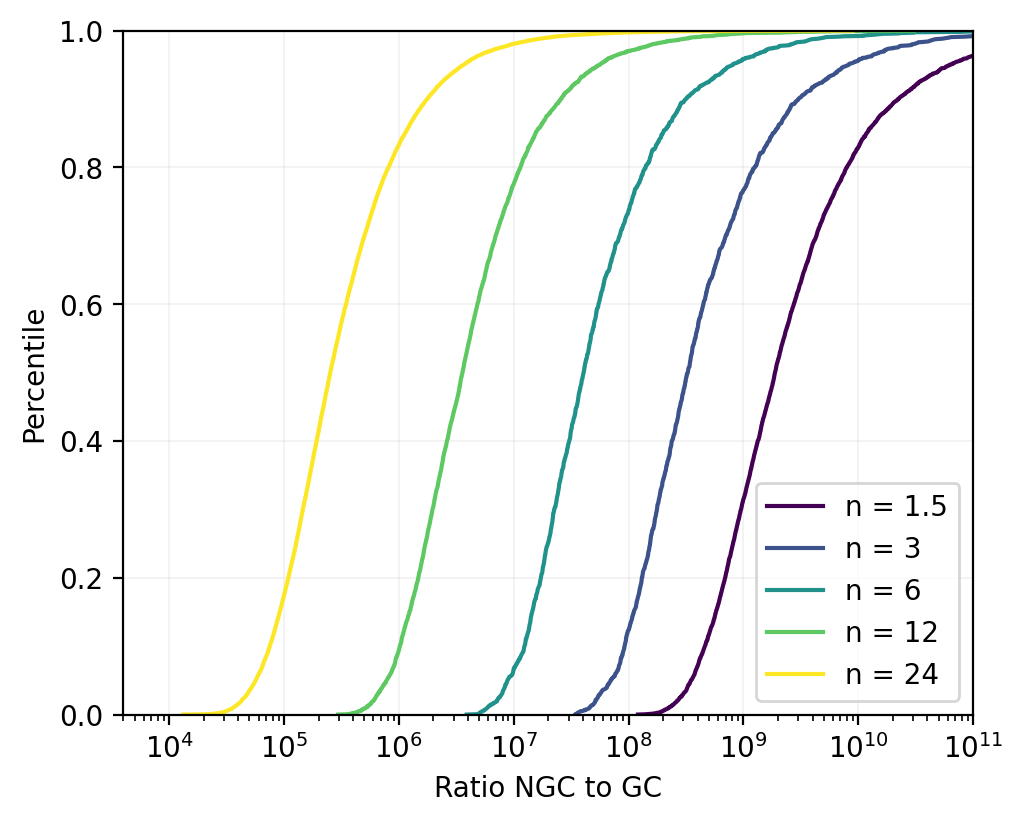

In [4]:
sc = 1.0
plt.rcParams['figure.constrained_layout.use'] = True
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']

xmaxs = [1e3, 1e6, 1e9, 1e11]
for figix in range(0, 4):
    fig = plt.figure(figsize=(5,4), dpi=200)
    ax  = fig.add_subplot(111)
    leg = []
    for nix, true_n in enumerate(true_nlist):
        ratioNonGC = plot_data[(true_n, sc)][figix]
        C = ratioNonGC.shape[0]
        pctiles = 1-(np.arange(1, C+1)/float(C))
        plt.plot(ratioNonGC, pctiles, '-', color=mycols[nix])
        leg.append(f"n = {true_n}")
    plt.xlabel('Ratio NGC to GC');
    plt.ylabel('Percentile');
    plt.gca().set_xscale('log')
    plt.gca().set_ylim(0, 1.0);
    plt.gca().set_xlim(plt.gca().get_xlim()[0], xmaxs[figix]);
    plt.grid(linewidth=0.1);
    plt.legend(leg, loc='lower right');
    fig.savefig(f'figures-friday/plotRatio-B{figix+1}.png', dpi=200);